In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Store filepath in a variable
twitter = "TwitterDec_Feb.csv"

In [3]:
# Bring in twitter data from CSV
twitter_df = pd.read_csv(twitter, encoding="ISO-8859-1")

# Show just the header
twitter_df.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,2/28/2020 15:44,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,6/30/2013 0:27
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,2/28/2020 15:44,World Health Org Official: Trumpâs press con...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,2/12/2010 21:43
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,2/28/2020 15:44,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoiceâ¢ America at http://yourvoi...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,12/9/2008 1:54
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,2/28/2020 15:44,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,3/25/2007 19:14
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,2/28/2020 15:44,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,12/6/2008 8:56


In [4]:
#Initial cleaning of data to drop NaNs, blanks, and only pull back needed columns
newtwitter_df = twitter_df[["Tweet Posted Time (UTC)", "Tweet Content", "Retweets Received", "Likes Received", "Tweet Location"]]
newtwitter_df.dropna(inplace = True) 
newtwitter_df.describe()

C:\Users\ljean\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Retweets Received,Likes Received
count,40620.000000,40620.000000
mean,3.416347,6.265657
std,47.974017,77.388210
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,5469.000000,6543.000000


In [5]:
#Seperate date from timestamp
newtwitter_df['Tweet Posted Time (UTC)'] = pd.to_datetime(newtwitter_df['Tweet Posted Time (UTC)'])
newtwitter_df['Date Posted'] = newtwitter_df['Tweet Posted Time (UTC)'].dt.date

date_twitter_df = newtwitter_df[['Date Posted', 'Retweets Received', "Likes Received","Tweet Location","Tweet Content"]]
date_twitter_df.dtypes

C:\Users\ljean\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ljean\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date Posted          object
Retweets Received     int64
Likes Received        int64
Tweet Location       object
Tweet Content        object
dtype: object

In [6]:
#Convert Date Column from object to datetime variable
date_twitter_df['Date Posted']=pd.to_datetime(date_twitter_df['Date Posted'])
date_twitter_df.dtypes


C:\Users\ljean\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date Posted          datetime64[ns]
Retweets Received             int64
Likes Received                int64
Tweet Location               object
Tweet Content                object
dtype: object

In [7]:
#Add additional column to group months in clearer fashion
date_twitter_df['Month']= date_twitter_df['Date Posted'].dt.month
cln_date_df = date_twitter_df[(date_twitter_df['Date Posted'].dt.month == 12)\
                              | (date_twitter_df['Date Posted'].dt.month == 1)\
                              | (date_twitter_df['Date Posted'].dt.month == 2)]

cln_tweets_df = cln_date_df[['Date Posted', "Month", 'Retweets Received', "Likes Received",\
                            "Tweet Location","Tweet Content"]]

cln_tweets_df

,Date Posted,Month,Retweets Received,Likes Received,Tweet Location,Tweet Content
1,2020-02-28,2,0,0,Los Angeles CA USA,World Health Org Official: Trumpâs press con...
2,2020-02-28,2,23,64,"Miami, FL","I mean, Liberals are cheer-leading this #Coron..."
3,2020-02-28,2,4,11,NYC and the North Fork,"Under repeated questioning, Pompeo refuses to ..."
4,2020-02-28,2,0,0,James S. Brady Press Briefing Room,#coronavirus comments now from @larry_kudlow h...
6,2020-02-28,2,3,9,NY/Delhi/Rio/Beijing/Nairobi/Joburg/London,âDisease can emerge everywhere. Coronaviruse...
...,...,...,...,...,...,...
60152,2019-12-10,12,0,0,"MatarÃ³, EspaÃ±a","Mediante microscopÃ­a electrÃ³nica, investigad..."
60154,2019-12-10,12,0,0,The Lair of the Beast,"RT @timhquotes: It's my party, you're invited!..."
60157,2019-12-10,12,2,28,"Jackson Hole, WY","It's my party, you're invited!\n\nPS, this is ..."
60158,2019-12-03,12,1,17,"Chapel Hill, NC",Amyâs a survivor! #bariclab #pnnl #movingon ...


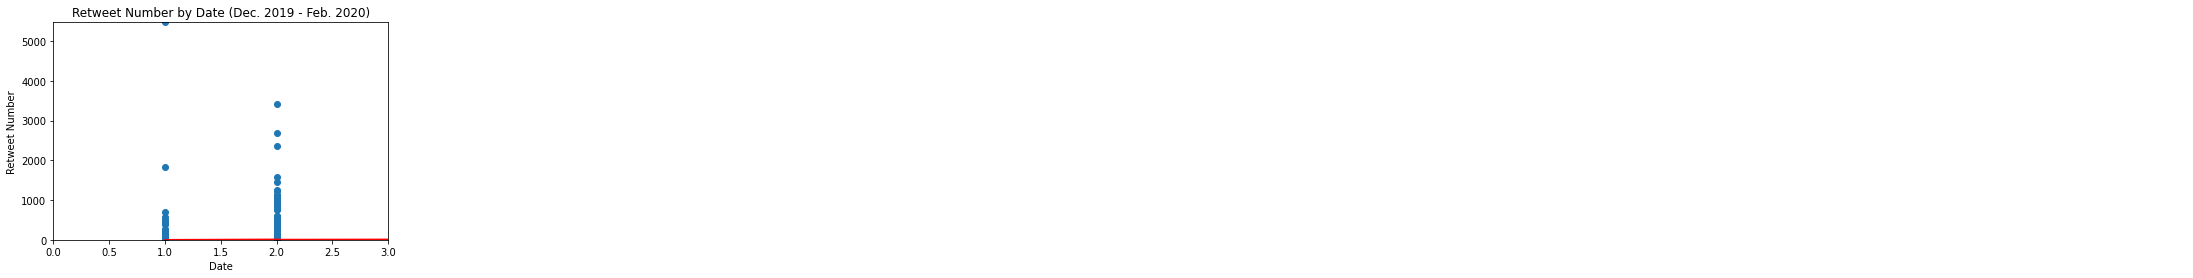

In [8]:
#Scatterplot for retweets overtime Perform the linear regression on the scatter plot
date = cln_tweets_df["Month"]
retweets = cln_tweets_df["Retweets Received"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(date, retweets)
regress_values = date * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(date, retweets)
plt.plot(date, regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

# Set the limits of the x axis
plt.xlim(0, 3)

# Set the limits of the y axis
plt.ylim(0, max(retweets)+0.4)

plt.title('Retweet Number by Date (Dec. 2019 - Feb. 2020)')
plt.xlabel('Date')
plt.ylabel('Retweet Number')
plt.show()

In [9]:
#Create Original Tweet Dataframe
org_tweet = cln_tweets_df.groupby(["Date Posted"])
group_tweet = org_tweet["Date Posted"].count()
group_tweet

tweet_analysis = pd.DataFrame({
    "Total Count" : group_tweet})

tweet_analysis.tail(5)


,Total Count
Date Posted,
2020-02-17,1491
2020-02-20,483
2020-02-21,2294
2020-02-25,455
2020-02-28,881


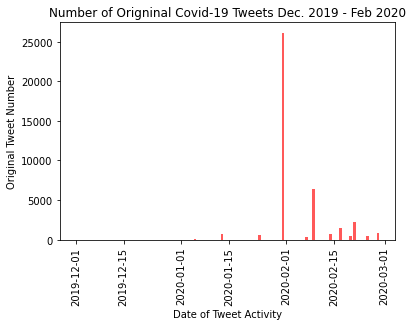

<Figure size 432x288 with 0 Axes>

In [10]:
#Bar Chart showing number of original tweets
plt.bar(tweet_analysis.index.values, tweet_analysis["Total Count"],color='r', alpha=0.65, align="center" )
plt.xticks(rotation=90)

#Label Bar Chart
plt.title("Number of Origninal Covid-19 Tweets Dec. 2019 - Feb 2020")
plt.xlabel("Date of Tweet Activity")
plt.ylabel("Original Tweet Number")
plt.show()
plt.tight_layout()

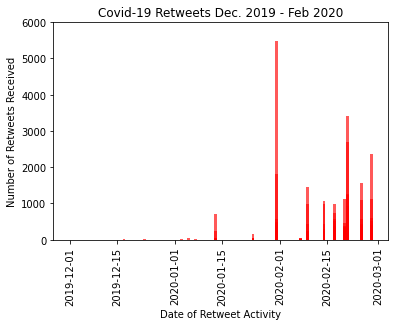

<Figure size 432x288 with 0 Axes>

In [11]:
#Bar Chart showing progression or retweets
cln_tweets_df
plt.bar(cln_tweets_df["Date Posted"], cln_tweets_df["Retweets Received"], color='r', alpha=0.65, align="center")

plt.xticks(rotation=90)

# Set the limits of the y axis
plt.ylim(0, 6000)

#Label Bar Chart
plt.title("Covid-19 Retweets Dec. 2019 - Feb 2020")
plt.xlabel("Date of Retweet Activity")
plt.ylabel("Number of Retweets Received")
plt.show()
plt.tight_layout()

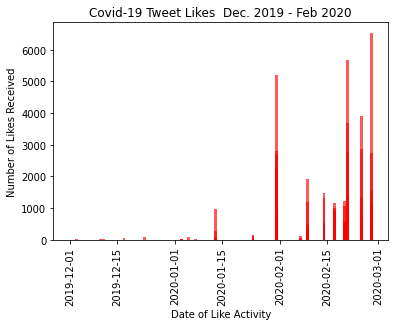

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
cln_tweets_df
plt.bar(cln_tweets_df["Date Posted"], cln_tweets_df["Likes Received"], color='r', alpha=0.65, align="center")
plt.xticks(rotation=90)

#Label Bar Chart
plt.title("Covid-19 Tweet Likes  Dec. 2019 - Feb 2020")
plt.xlabel("Date of Like Activity")
plt.ylabel("Number of Likes Received")
plt.show()
plt.tight_layout()